# Arbitrage Under Power Mean Reversion

Paper: Arbitrage Under Power Mean Reversion

Group Member: Siqi Fan,Ji Wu,Titash Ghoshal

In [134]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
import random

random.seed(1)

## 1.Simulation

### 1.1 Simulation (𝝈 = 1)

In [162]:
import matplotlib.pyplot as plt
T = 1/252*800
dt = 1/252
N = round(T/dt)
t = np.linspace(0,T,N)
x = [0]
k = 2
sig = 1
mu = 0
gamma=-2

z = np.random.randn(N)
sigdBt = sig*np.sqrt(dt)*z
for i in range(0,len(t)-1):
    x.append(x[i]+k*(mu-x[i])*dt+sigdBt[i])
    


In [163]:
simulation_price['Days'] = simulation_price.index
simulation_price = simulation_price.set_index('Days')
simulation_price.plot(figsize=(10,3),title = "Simulation Price",)


In [164]:
df = pd.DataFrame(x,columns = ['price'])
df['t'] = df.index/252
df['tao'] = T - df['t']
v=1 /np.sqrt(1-gamma)

,price,t,tao
0,0.000000,0.000000,3.174603
1,-0.024962,0.003968,3.170635
2,0.047268,0.007937,3.166667
3,-0.020669,0.011905,3.162698
4,-0.012800,0.015873,3.158730


In [166]:
df['Ct'] = np.cosh(v*pd.DataFrame(df['tao']).values) + v*np.sinh(v*pd.DataFrame(df['tao']).values)
df['C1t']= (v)*np.sinh(v*df['tao']) + (v**2)*np.cosh(v*df['tao'])
df['Dt']= df['C1t']/df['Ct']


In [167]:
df.head()

,price,t,tao,Ct,C1t,Dt
0,0.000000,0.000000,3.174603,4.964386,2.827157,0.569488
1,-0.024962,0.003968,3.170635,4.953180,2.820598,0.569452
2,0.047268,0.007937,3.166667,4.942000,2.814054,0.569416
3,-0.020669,0.011905,3.162698,4.930846,2.807524,0.569380
4,-0.012800,0.015873,3.158730,4.919718,2.801009,0.569343


In [168]:
df['dx'] = df.price - df.price.shift(1)

In [169]:
df.head()

,price,t,tao,Ct,C1t,Dt,dx
0,0.000000,0.000000,3.174603,4.964386,2.827157,0.569488,NaN
1,-0.024962,0.003968,3.170635,4.953180,2.820598,0.569452,-0.024962
2,0.047268,0.007937,3.166667,4.942000,2.814054,0.569416,0.072230
3,-0.020669,0.011905,3.162698,4.930846,2.807524,0.569380,-0.067936
4,-0.012800,0.015873,3.158730,4.919718,2.801009,0.569343,0.007869


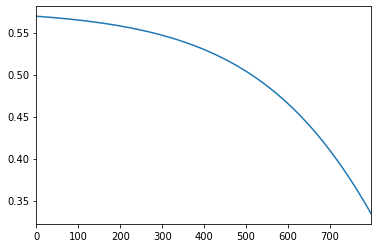

In [170]:
df.Dt.plot()

In [171]:
w = [1]
alpha = [0]

for i in range(0,len(t)-1):
    alpha.append(-w[i]*df.price[i]*df.Dt[i])
    if abs(df.price[i]) >= np.sqrt(1/df.Dt[i]):
        alpha[i+1] = 0
    w.append(w[i]+alpha[i+1]*df.dx[i+1])

In [174]:
df['position'] = alpha
df['wealth'] = w
df['upper_band'] = np.sqrt(1/df.Dt)
df['lower_band'] = - df['upper_band']



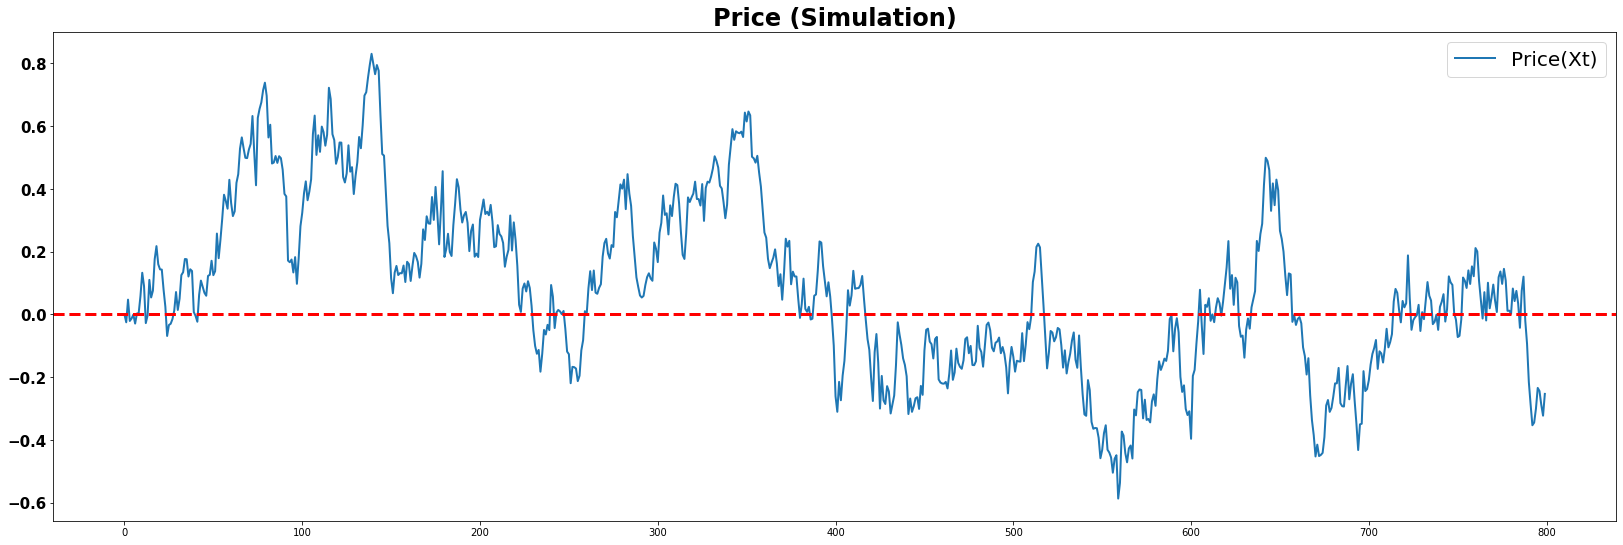

In [418]:
fig = plt.figure(figsize=(28,9))
plt.plot(df.index, df.price, linewidth = 2,label = 'Price(Xt)')  
plt.title("Price (Simulation)",fontsize = 24, fontweight = 'bold') 
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.axhline(0, color='r',linestyle='--', linewidth = 3)
plt.legend(fontsize = 20)
plt.show()


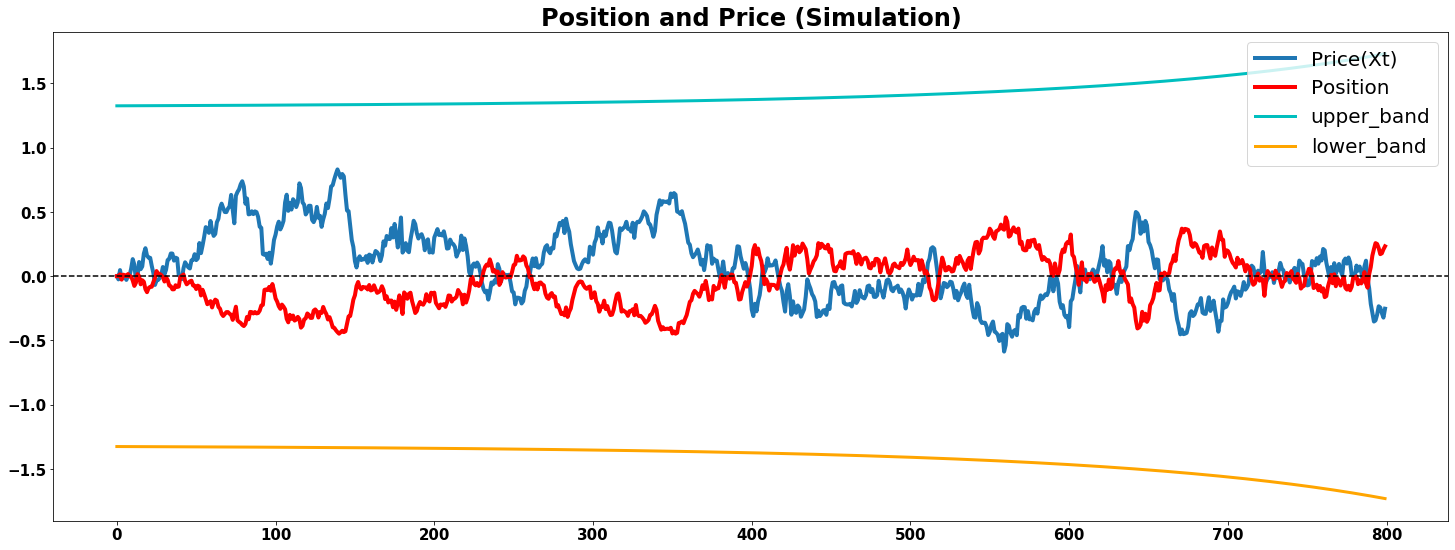

In [192]:
# 
fig = plt.figure(figsize=(25,9))
plt.plot(simulation_price.index, df.price, linewidth = 4.0,label = 'Price(Xt)')  
plt.plot(simulation_price.index, df.position, linewidth=4.0,color = 'r',label = 'Position') 
plt.plot(simulation_price.index, df.upper_band, linewidth=3.0,color = 'c',label = 'upper_band') 
plt.plot(simulation_price.index, df.lower_band, linewidth=3.0,color = 'orange',label = 'lower_band') 
plt.title("Position and Price (Simulation)",fontsize = 24, fontweight = 'bold') 
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.axhline(0, color='k',linestyle='--')
plt.legend(fontsize = 20)
plt.show()

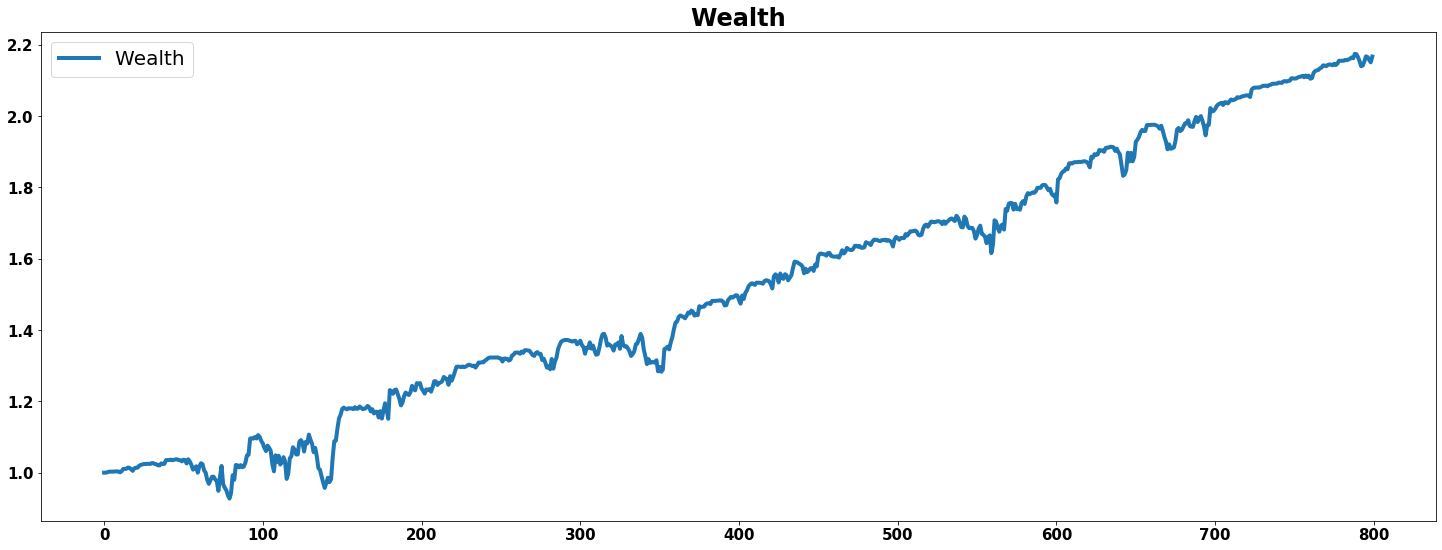

In [195]:
# 
fig = plt.figure(figsize=(25,9))
plt.plot(simulation_price.index, df.wealth, linewidth=4.0,label = 'Wealth') 
plt.title("Wealth",fontsize = 24, fontweight = 'bold') 
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
#plt.axhline(0, color=’k’)
plt.legend(fontsize = 20)
plt.show()

### 1.2 Simulation(𝝈 = 3)

In [206]:
import matplotlib.pyplot as plt
T = 1/252*800
dt = 1/252
N = round(T/dt)
t = np.linspace(0,T,N)
x = [0]
k = 2
sig = 3
mu = 0
gamma=-2

z = np.random.randn(N)
sigdBt = sig*np.sqrt(dt)*z
for i in range(0,len(t)-1):
    x.append(x[i]+k*(mu-x[i])*dt+sigdBt[i])
   

In [207]:
df1 = pd.DataFrame(x,columns = ['price'])
df1['t'] = df1.index/252
df1['tao'] = T - df1['t']
df1.head()

#scaling
df1['Ct'] = np.cosh(v*pd.DataFrame(df1['tao']).values) + v*np.sinh(v*pd.DataFrame(df1['tao']).values)
df1['C1t']= (v)*np.sinh(v*df1['tao']) + (v**2)*np.cosh(v*df1['tao'])
df1['Dt']= df1['C1t']/df1['Ct']

df1['dx'] = df1.price - df1.price.shift(1)

w = [1]
alpha = [0]

for i in range(0,len(t)-1):
    alpha.append(-w[i]*df1.price[i]*df1.Dt[i])
    if abs(df1.price[i]) >= np.sqrt(1/df1.Dt[i]):
        alpha[i+1] = 0
    w.append(w[i]+alpha[i+1]*df1.dx[i+1])


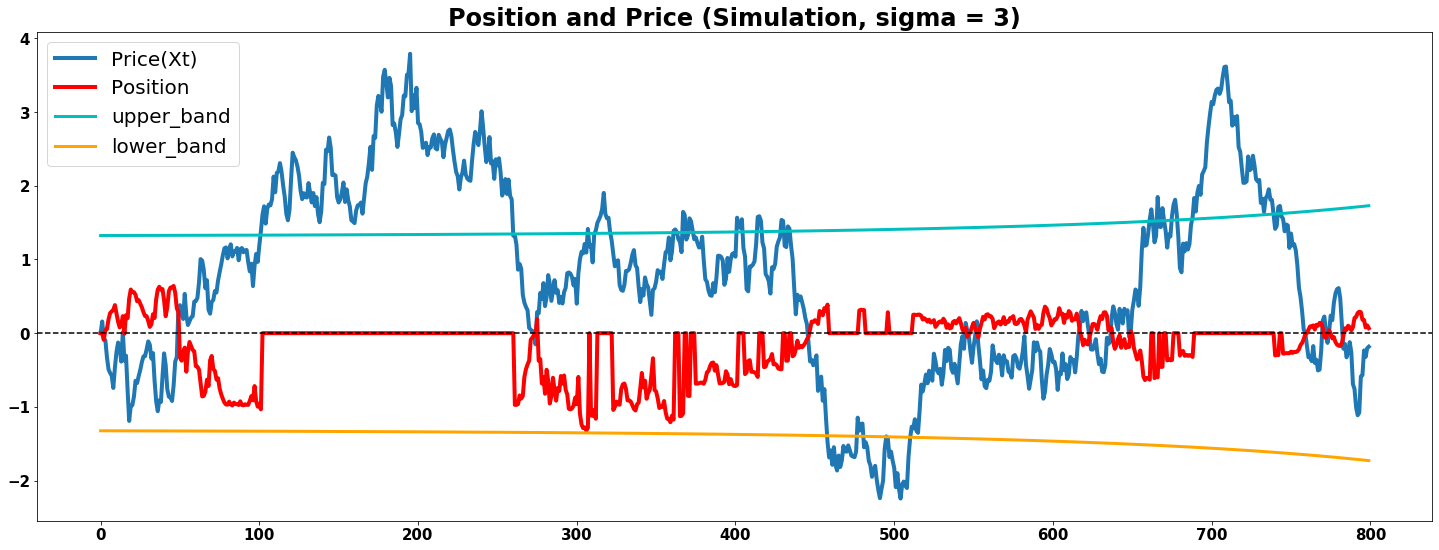

In [208]:
df1['position'] = alpha
df1['wealth'] = w
#df1['Days'] = df1.index
#df1 = df1.set_index('Days')
df1['upper_band'] = np.sqrt(1/df1.Dt)
df1['lower_band'] = - df1['upper_band']

# 
fig = plt.figure(figsize=(25,9))
plt.plot(simulation_price.index, df1.price, linewidth = 4.0,label = 'Price(Xt)')  
plt.plot(simulation_price.index, df1.position, linewidth=4.0,color = 'r',label = 'Position') 
plt.plot(simulation_price.index, df1.upper_band, linewidth=3.0,color = 'c',label = 'upper_band') 
plt.plot(simulation_price.index, df1.lower_band, linewidth=3.0,color = 'orange',label = 'lower_band') 
plt.title("Position and Price (Simulation, sigma = 3)",fontsize = 24, fontweight = 'bold') 
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.axhline(0, color='k',linestyle='--')
plt.legend(fontsize = 20)
plt.show()

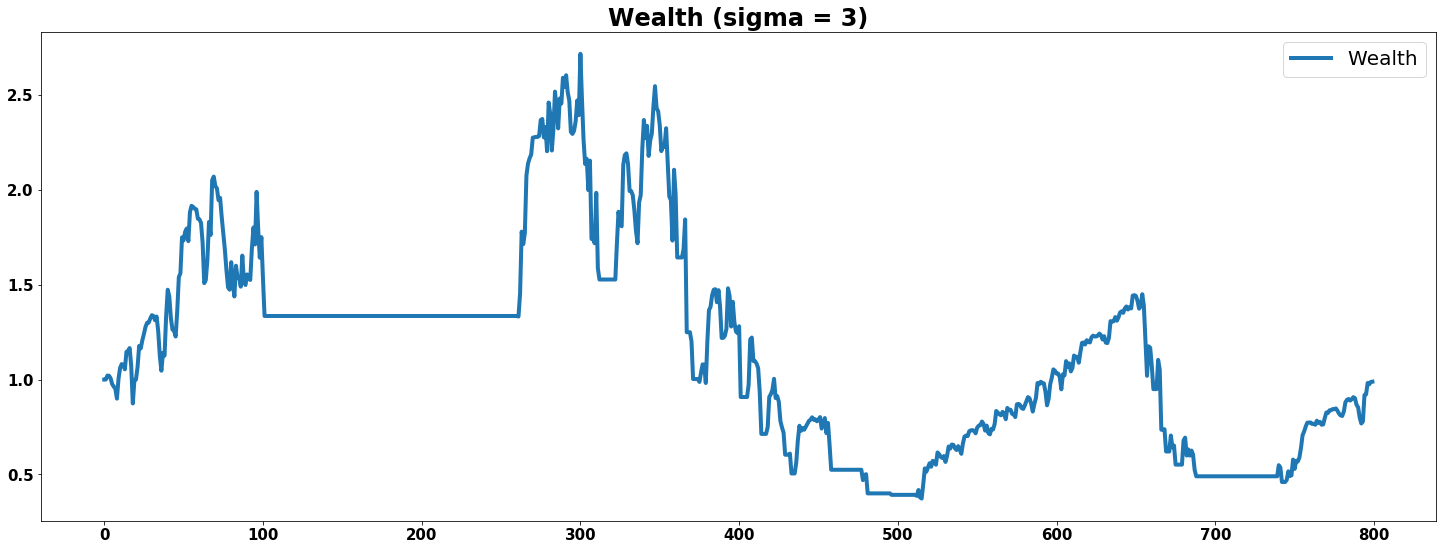

In [209]:
# 
fig = plt.figure(figsize=(25,9))
plt.plot(simulation_price.index, df1.wealth, linewidth=4.0,label = 'Wealth') 
plt.title("Wealth (sigma = 3)",fontsize = 24, fontweight = 'bold') 
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.legend(fontsize = 20)
plt.show()

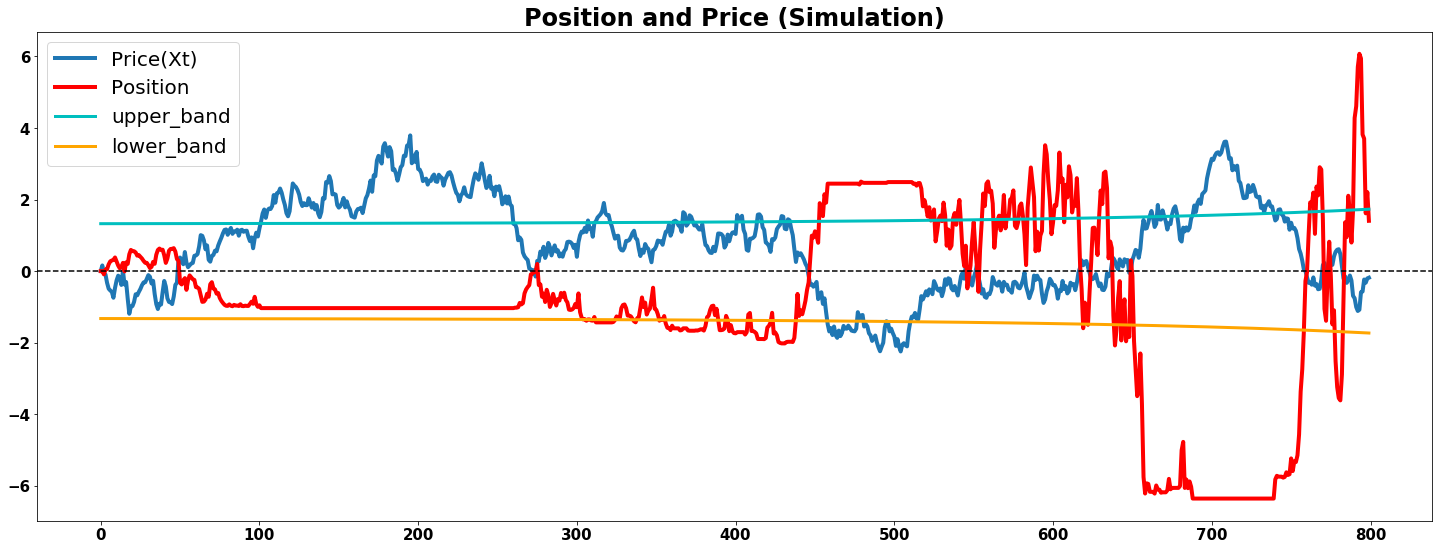

In [210]:
w = [1]
alpha = [0]
for i in range(0,len(t)-1):
    alpha.append(-w[i]*df1.price[i]*df1.Dt[i])
    if abs(df1.price[i]) >= np.sqrt(1/df1.Dt[i]):
        alpha[i+1] = alpha[i]
    w.append(w[i]+alpha[i+1]*df1.dx[i+1])

df1['position'] = alpha
df1['wealth'] = w
#df1['Days'] = df1.index
#df1 = df1.set_index('Days')
df1['upper_band'] = np.sqrt(1/df1.Dt)
df1['lower_band'] = - df1['upper_band']

# 
fig = plt.figure(figsize=(25,9))
plt.plot(simulation_price.index, df1.price, linewidth = 4.0,label = 'Price(Xt)')  
plt.plot(simulation_price.index, df1.position, linewidth=4.0,color = 'r',label = 'Position') 
plt.plot(simulation_price.index, df1.upper_band, linewidth=3.0,color = 'c',label = 'upper_band') 
plt.plot(simulation_price.index, df1.lower_band, linewidth=3.0,color = 'orange',label = 'lower_band') 
plt.title("Position and Price (Simulation)",fontsize = 24, fontweight = 'bold') 
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.axhline(0, color='k',linestyle='--')
plt.legend(fontsize = 20)
plt.show()

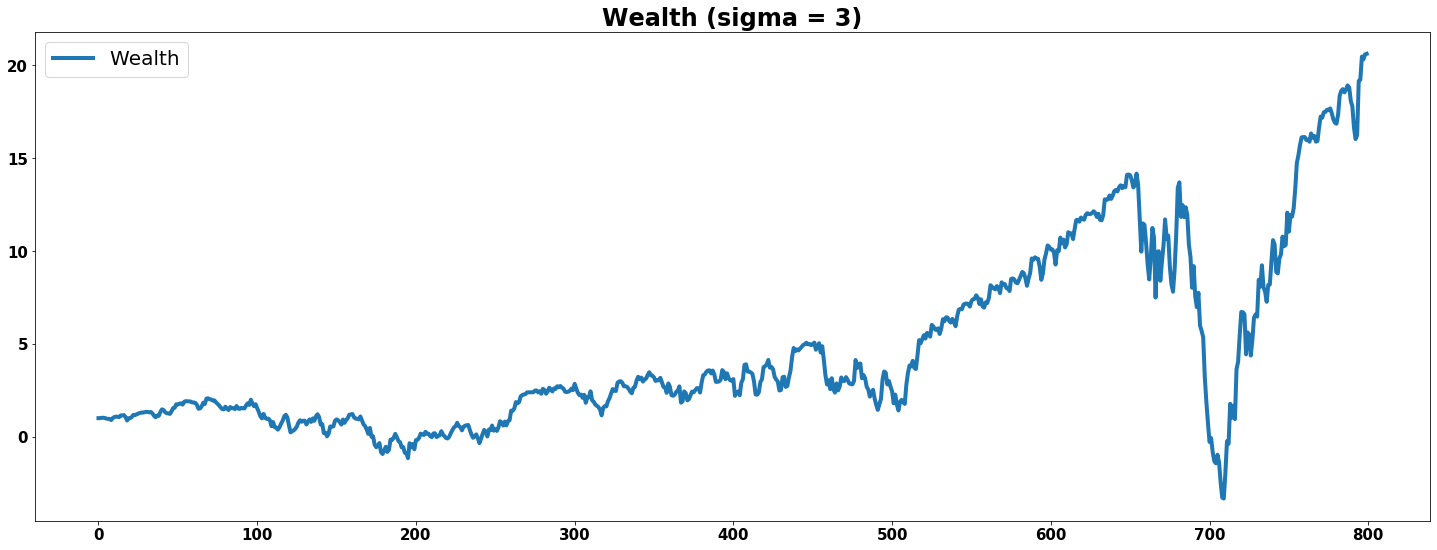

In [211]:
fig = plt.figure(figsize=(25,9))
plt.plot(simulation_price.index, df1.wealth, linewidth=4.0,label = 'Wealth') 
plt.title("Wealth (sigma = 3)",fontsize = 24, fontweight = 'bold') 
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.legend(fontsize = 20)
plt.show()

# 2.Real Data

In [226]:
import datetime
import pandas as pd
import pandas_datareader.data as web

In [227]:
start = datetime.datetime(2010,1, 1) # or start = '1/1/2016'
end = datetime.date.today()
price1 = web.DataReader('SGOL', 'yahoo', start, end)
price2 = web.DataReader('IAU','yahoo',start,end)


In [228]:
diff = price1['Adj Close'] - price2['Adj Close']
Xt = pd.DataFrame()
Xt['Xt'] = diff

In [229]:
Xt = Xt.rename(columns = {'diff':'Xt'})
Xt['dx'] = Xt.Xt - Xt.Xt.shift(1)

Xt = Xt.dropna()
Xt['ma252'] = pd.DataFrame(Xt.Xt.rolling(window=252).mean())
Xt['sig'] = pd.DataFrame(Xt.Xt.rolling(window=252).std())
Xt.head()

,Xt,dx,ma252,sig
Date,,,,
2010-01-05,0.207000,0.003000,NaN,NaN
2010-01-06,0.209000,0.002000,NaN,NaN
2010-01-07,0.211000,0.002001,NaN,NaN
2010-01-08,0.207999,-0.003001,NaN,NaN
2010-01-11,0.204000,-0.003999,NaN,NaN


In [236]:
from sklearn.linear_model import LinearRegression
import time
win = 252
X = pd.DataFrame((Xt['Xt']-Xt['ma252']).dropna()).values*dt
y = pd.DataFrame(Xt['dx'][-2249:]).values
k_rolling = []
import warnings
warnings.filterwarnings("ignore") 
for t in range(0,len(X)-win+1):
    #start = time.clock()
    trainX = X[t:t+win]
    trainY = y[t:t+win]
    reg = LinearRegression().fit(trainX, trainY)
    reg.score(X, y)
    
    k_rolling.append(reg.coef_)
    #elapsed = (time.clock() - start)
    #print("Time used:", elapsed, 'sec')

In [237]:
k_coff = []
for i in range(len(k_rolling)):
    k_coff.append(k_rolling[i][0][0])

In [238]:
k_beta = pd.DataFrame(k_coff,index = Xt[win+win-2:].index,columns = ['Rolling_k'])


In [239]:
Xt = Xt.join(k_beta).dropna()

In [240]:
T = len(Xt)/252
dt = 1/252
N = round(T/dt)
t = np.linspace(0,T,N)
gamma=-2

Xt['t'] = np.arange(0, len(Xt))/252
Xt['tao'] = T - Xt['t']

Xt.head() 


,Xt,dx,ma252,sig,Rolling_k,t,tao
Date,,,,,,,
2011-12-30,0.263000,0.014000,0.261151,0.020916,52.431090,0.000000,7.928571
2012-01-03,0.262000,-0.001000,0.261226,0.020885,52.147785,0.003968,7.924603
2012-01-04,0.250000,-0.012000,0.261286,0.020831,52.735959,0.007937,7.920635
2012-01-05,0.270999,0.020999,0.261417,0.020788,51.701803,0.011905,7.916667
2012-01-06,0.261000,-0.009999,0.261520,0.020720,52.200551,0.015873,7.912698


In [241]:
Xt['Ct'] = np.cosh(v*pd.DataFrame(Xt['tao']).values) + v*np.sinh(v*pd.DataFrame(Xt['tao']).values)
Xt['C1t']= (v)*np.sinh(v*Xt['tao']) + (v**2)*np.cosh(v*Xt['tao'])
Xt['Dt']= Xt['C1t']/Xt['Ct']
Xt.head()

,Xt,dx,ma252,sig,Rolling_k,t,tao,Ct,C1t,Dt
Date,,,,,,,,,,
2011-12-30,0.263000,0.014000,0.261151,0.020916,52.431090,0.000000,7.928571,76.722144,44.293042,0.577318
2012-01-03,0.262000,-0.001000,0.261226,0.020885,52.147785,0.003968,7.924603,76.546579,44.191674,0.577317
2012-01-04,0.250000,-0.012000,0.261286,0.020831,52.735959,0.007937,7.920635,76.371416,44.090538,0.577317
2012-01-05,0.270999,0.020999,0.261417,0.020788,51.701803,0.011905,7.916667,76.196654,43.989633,0.577317
2012-01-06,0.261000,-0.009999,0.261520,0.020720,52.200551,0.015873,7.912698,76.022292,43.888959,0.577317


In [242]:
w = [1]
alpha = [0]
x = [0]
for i in range(0,len(t)-1):
    alpha.append(-w[i]*(Xt.Xt[i]-Xt.ma252[i])*Xt.Dt[i])
    if abs(Xt.Xt[i]-Xt.ma252[i]) >= np.sqrt(1/Xt.Dt[i]):
        alpha[i+1] = alpha[i]
    w.append(w[i]+alpha[i+1]*Xt.dx[i+1])


In [272]:
Xt['position'] = alpha
Xt['wealth'] = w

#Xt.loc[:,['Xt','position']].plot(title = 'Price and position')

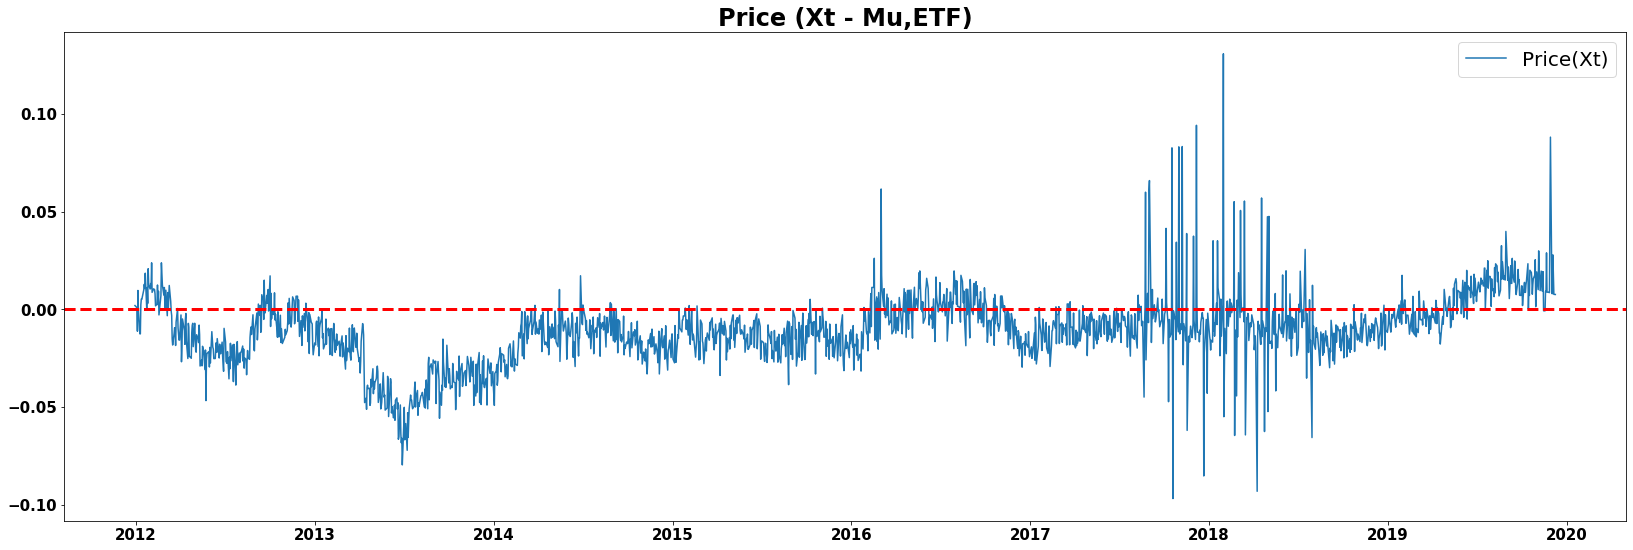

In [276]:
fig = plt.figure(figsize=(28,9))
plt.plot(Xt.index, Xt.Xt - Xt.ma252, linewidth = 1.5,label = 'Price(Xt)')   
plt.title("Price (Xt - Mu,ETF)",fontsize = 24, fontweight = 'bold') 
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.axhline(0, color='r',linestyle='--', linewidth = 3)
plt.legend(fontsize = 20)
plt.show()


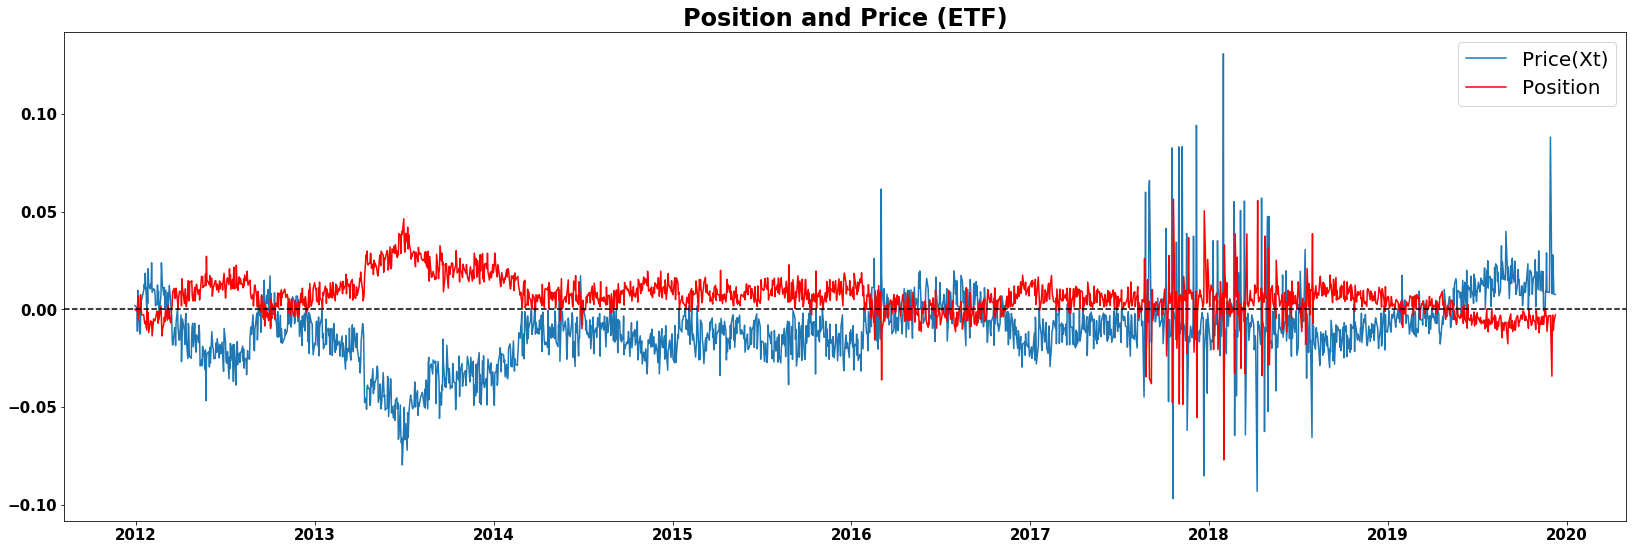

In [271]:
fig = plt.figure(figsize=(28,9))
plt.plot(Xt.index, Xt.Xt - Xt.ma252, linewidth = 1.5,label = 'Price(Xt)')  
plt.plot(Xt.index, Xt.position, linewidth=1.5,color = 'r',label = 'Position') 
plt.title("Position and Price (ETF)",fontsize = 24, fontweight = 'bold') 
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.axhline(0, color='k',linestyle='--')
plt.legend(fontsize = 20)
plt.show()

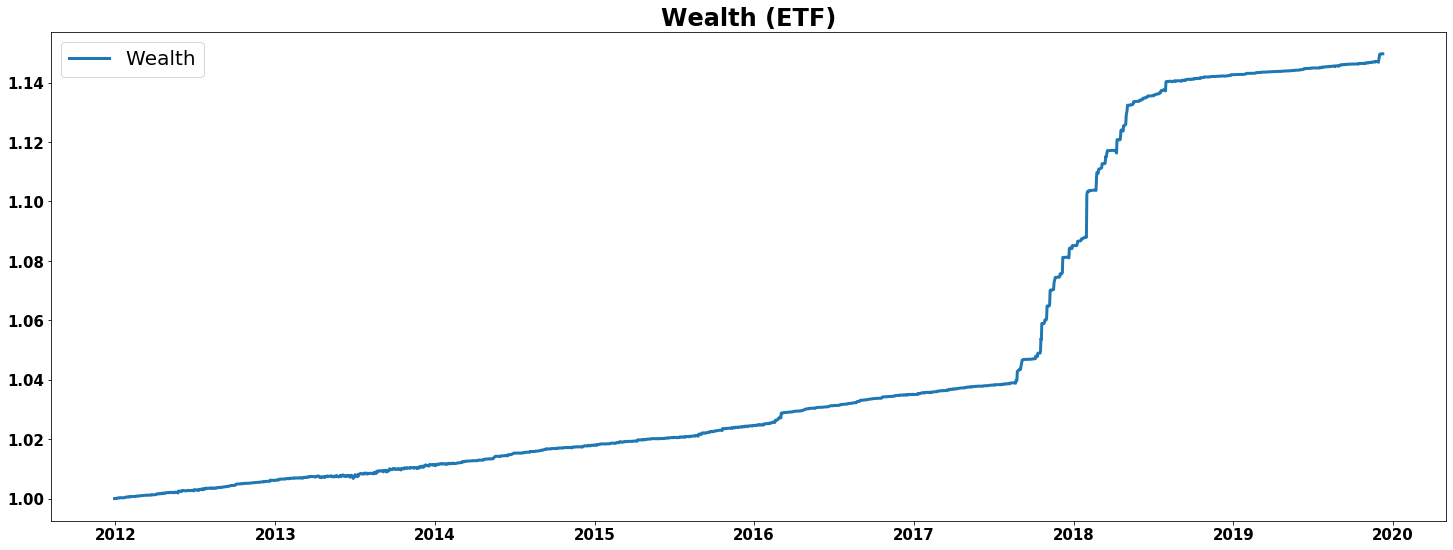

In [273]:
fig = plt.figure(figsize=(25,9))
plt.plot(Xt.index, Xt.wealth, linewidth=3.0,label = 'Wealth') 
plt.title("Wealth (ETF)",fontsize = 24, fontweight = 'bold') 
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.legend(fontsize = 20)
plt.show()
#plt.savefig("filename.png")

# 3.Sensitive Analyse

## 3.1 Gamma sensitive with D(t)

In [293]:
test = df

In [373]:
def Dt_cal(gamma):
    tt = pd.DataFrame(index = range(0,800,1))
    v = 1/np.sqrt(1-gamma)
    tt['Ct'] = np.cosh(v*pd.DataFrame(test['tao'].values))+ v*np.sinh(v*pd.DataFrame(test['tao'].values))
    tt['Ctt'] = (v)*np.sinh(v*test['tao'].values) + (v**2)*np.cosh(v*test['tao'].values)
    tt['Dt'] = tt.Ctt/tt.Ct
    return tt.Dt.values

In [374]:
Dt = []
tt = pd.DataFrame(index = range(0,800,1))
for gamma in [-16,-2,0,0.3,0.6]:
    Dt.append(Dt_cal(gamma))

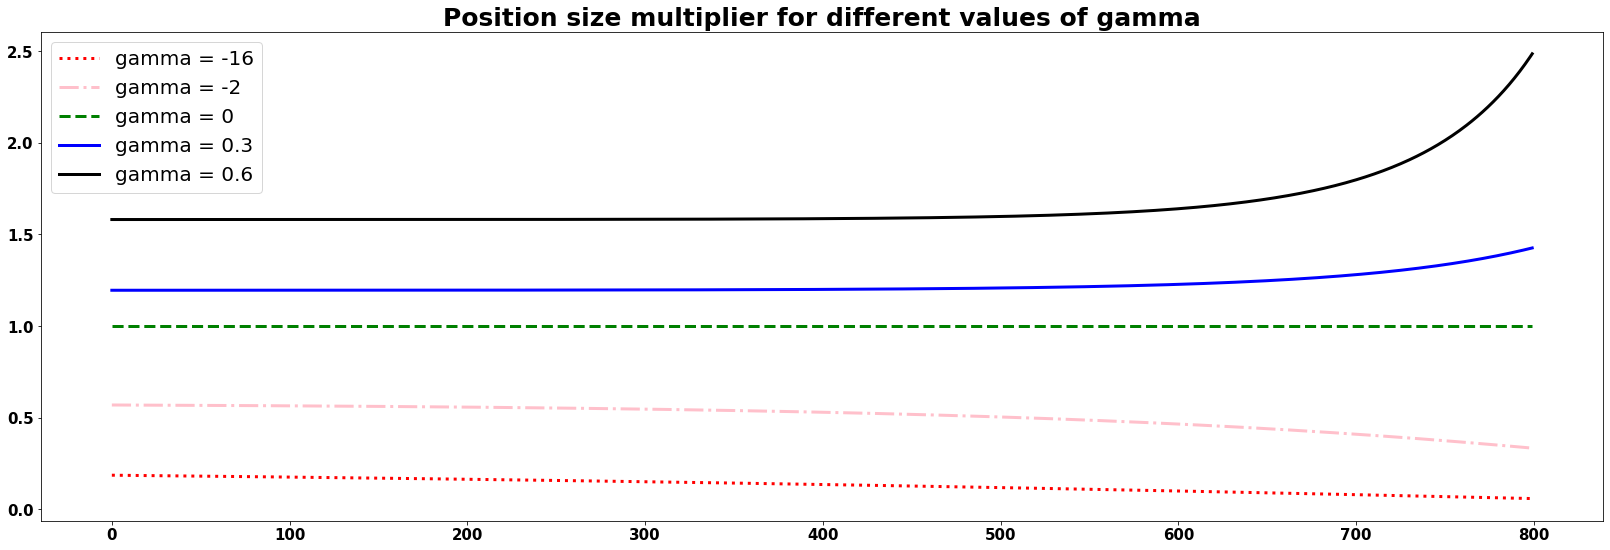

In [392]:
fig = plt.figure(figsize=(28,9))
plt.plot(tt.index,Dt[0],label = "gamma = -16" , color = 'r', linewidth = 3,linestyle=':')
plt.plot(tt.index,Dt[1],label = "gamma = -2" , color = 'pink', linewidth = 3,linestyle='-.')
plt.plot(tt.index,Dt[2],label = "gamma = 0" , color = 'g', linewidth = 3,linestyle='--')
plt.plot(tt.index,Dt[3],label = "gamma = 0.3" , color = 'b', linewidth = 3)
plt.plot(tt.index,Dt[4],label = "gamma = 0.6" , color = 'k', linewidth = 3)
plt.title('Position size multiplier for different values of gamma',fontsize = 25 , fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.legend(fontsize = 20)
plt.show()

## 3.2 Real Data

In [399]:
def position_wealth(gamma,df1):
    tt = pd.DataFrame(index = range(0,800,1))
    v = 1/np.sqrt(1-gamma)
    tt['Ct'] = np.cosh(v*pd.DataFrame(df1['tao'].values))+ v*np.sinh(v*pd.DataFrame(df1['tao'].values))
    tt['Ctt'] = (v)*np.sinh(v*df1['tao'].values) + (v**2)*np.cosh(v*df1['tao'].values)
    tt['Dt'] = tt.Ctt/tt.Ct
    w = [1]
    alpha = [0]
    for i in range(0,len(tt)-1):
        alpha.append(-w[i]*df1.price[i]*tt.Dt[i])
        if abs(df1.price[i]) >= np.sqrt(1/tt.Dt[i]):
            alpha[i+1] = alpha[i]
        w.append(w[i]+alpha[i+1]*df1.dx[i+1])
    tt['position'] = alpha
    tt['wealth'] = w
    
    return tt.position.values
#,tt.wealth.values

In [400]:
POSITION = []
for gamma in [-16,-2,0,0.3,0.6]:
    POSITION.append(position_wealth(gamma,df1))

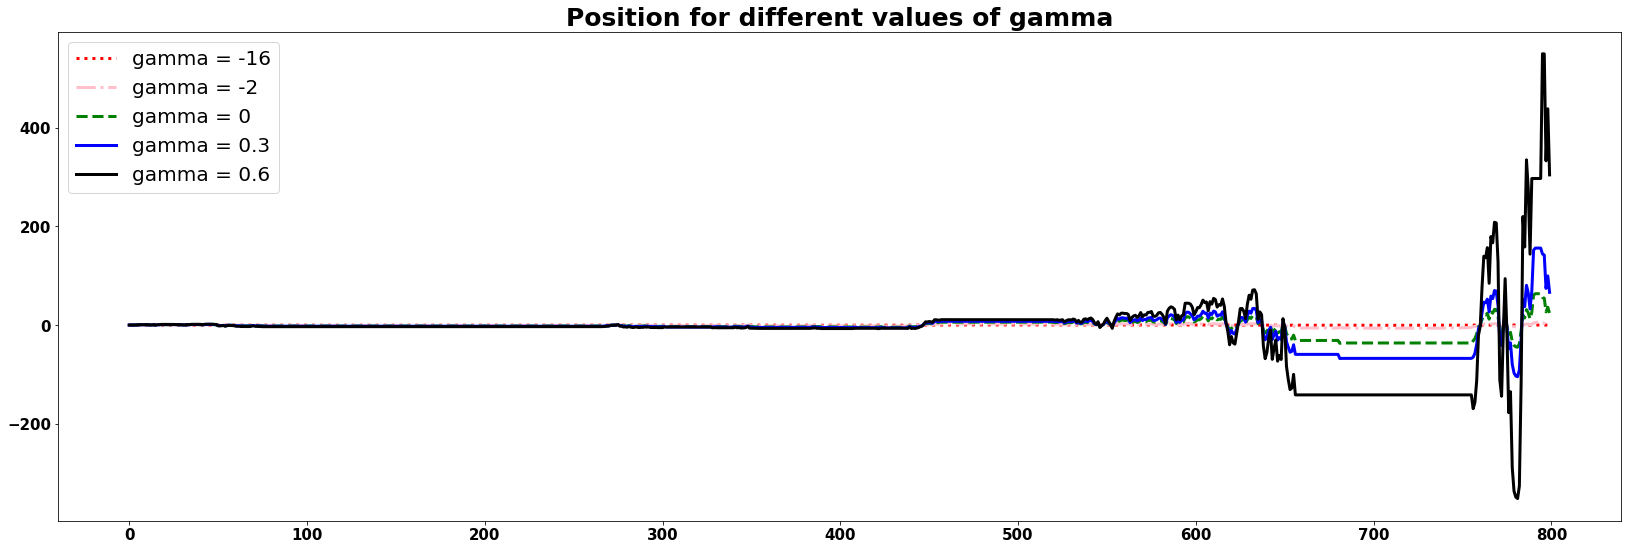

In [408]:
fig = plt.figure(figsize=(28,9))
plt.plot(tt.index,POSITION[0],label = "gamma = -16" , color = 'r', linewidth = 3,linestyle=':')
plt.plot(tt.index,POSITION[1],label = "gamma = -2" , color = 'pink', linewidth = 3,linestyle='-.')
plt.plot(tt.index,POSITION[2],label = "gamma = 0" , color = 'g', linewidth = 3,linestyle='--')
plt.plot(tt.index,POSITION[3],label = "gamma = 0.3" , color = 'b', linewidth = 3)
plt.plot(tt.index,POSITION[4],label = "gamma = 0.6" , color = 'k', linewidth = 3)
plt.title('Position for different values of gamma',fontsize = 25 , fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.legend(fontsize = 20)
plt.show()

In [405]:
def position_wealth(gamma,df1):
    tt = pd.DataFrame(index = range(0,800,1))
    v = 1/np.sqrt(1-gamma)
    tt['Ct'] = np.cosh(v*pd.DataFrame(df1['tao'].values))+ v*np.sinh(v*pd.DataFrame(df1['tao'].values))
    tt['Ctt'] = (v)*np.sinh(v*df1['tao'].values) + (v**2)*np.cosh(v*df1['tao'].values)
    tt['Dt'] = tt.Ctt/tt.Ct
    w = [1]
    alpha = [0]
    for i in range(0,len(tt)-1):
        alpha.append(-w[i]*df1.price[i]*tt.Dt[i])
        if abs(df1.price[i]) >= np.sqrt(1/tt.Dt[i]):
            alpha[i+1] = alpha[i]
        w.append(w[i]+alpha[i+1]*df1.dx[i+1])
    tt['position'] = alpha
    tt['wealth'] = w
    
    return tt.wealth.values

In [406]:
WEALTH = []
for gamma in [-16,-2,0,0.3,0.6]:
    WEALTH.append(position_wealth(gamma,df1))
    

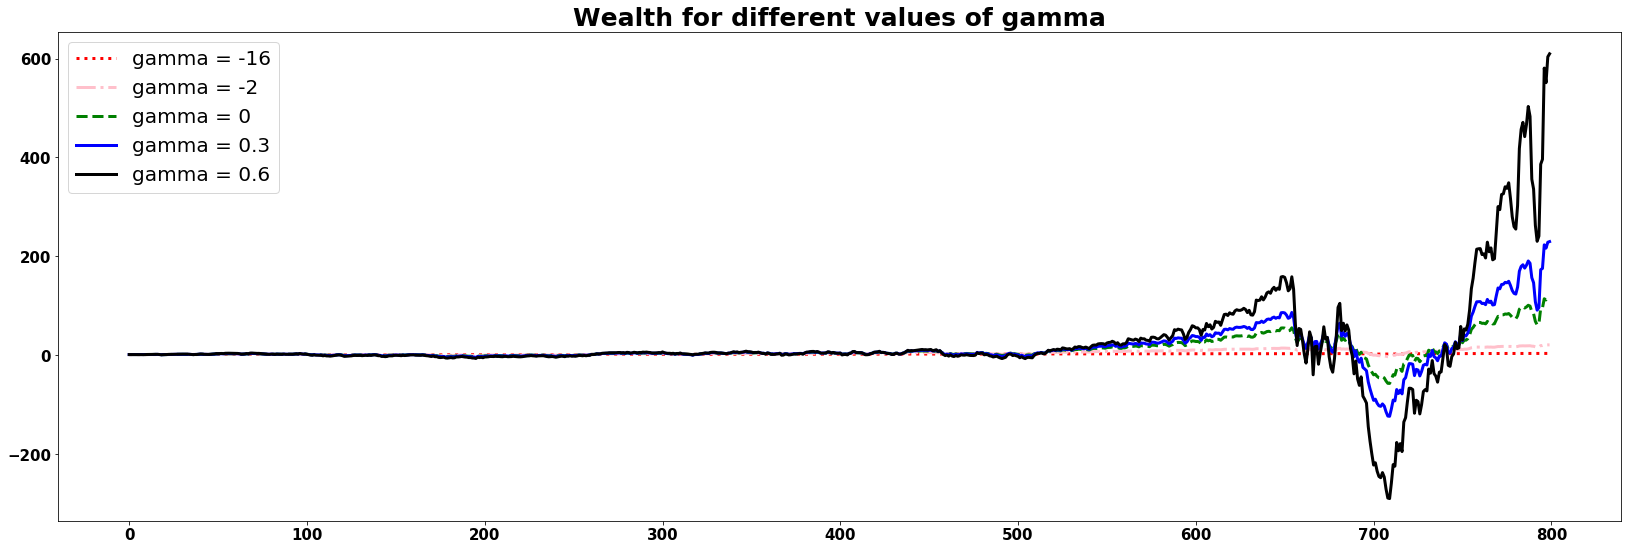

In [409]:
fig = plt.figure(figsize=(28,9))
plt.plot(tt.index,WEALTH[0],label = "gamma = -16" , color = 'r', linewidth = 3,linestyle=':')
plt.plot(tt.index,WEALTH[1],label = "gamma = -2" , color = 'pink', linewidth = 3,linestyle='-.')
plt.plot(tt.index,WEALTH[2],label = "gamma = 0" , color = 'g', linewidth = 3,linestyle='--')
plt.plot(tt.index,WEALTH[3],label = "gamma = 0.3" , color = 'b', linewidth = 3)
plt.plot(tt.index,WEALTH[4],label = "gamma = 0.6" , color = 'k', linewidth = 3)
plt.title('Wealth for different values of gamma',fontsize = 25 , fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.legend(fontsize = 20)
plt.show()

# 4. Real Data Performance

In [420]:
sigma1 = pd.DataFrame(df['wealth']).join(pd.DataFrame(df['position']))
sigma3 = pd.DataFrame(df1['wealth']).join(pd.DataFrame(df1['position']))
real_data = pd.DataFrame(Xt['wealth']).join(pd.DataFrame(Xt['position']))

In [427]:
sigma1 = sigma1.rename(columns = {'wealth':'sigma1_wealth','position':'sigma1_position'})

In [ ]:
sigma1 = sigma1.rename(columns = {'wealth':'sigma1_wealth','position':'sigma1_position'})
sigma3 = sigma3.rename(columns = {'wealth':'sigma3_wealth','position':'sigma3_position'})
real_data = real_data.rename(columns = {'wealth':'real_data_wealth','position':'real_data_position'})

In [437]:
real_data = real_data.rename(columns = {'wealth':'real_data_wealth','position':'real_data_position'})
real_data.head()

,real_data_wealth,real_data_position
Date,,
2011-12-30,1.000000,0.000000
2012-01-03,1.000001,-0.001068
2012-01-04,1.000006,-0.000447
2012-01-05,1.000143,0.006515
2012-01-06,1.000199,-0.005533


In [439]:
sigma1.join(sigma3).describe()

,sigma1_wealth,sigma1_position,sigma3_wealth,sigma3_position
count,800.000000,800.000000,800.000000,800.000000
mean,1.521163,-0.043132,4.663413,-0.864590
std,0.360216,0.189854,4.860177,2.446796
min,0.927433,-0.447258,-3.325949,-6.355254
25%,1.234169,-0.183846,1.205285,-1.432705
50%,1.493759,-0.044483,2.681893,-1.033796
75%,1.806792,0.090336,7.484991,0.602952
max,2.174743,0.457790,20.603093,6.072194


In [440]:
real_data.describe()

,real_data_wealth,real_data_position
count,1998.000000,1998.000000
mean,1.048943,0.006444
std,0.052088,0.010118
min,1.000000,-0.077139
25%,1.011368,0.001173
50%,1.024395,0.006080
75%,1.081172,0.011283
max,1.149696,0.056343


In [445]:
max_drawdown(sigma1['sigma1_wealth'])


0.1352

In [460]:
df.cummax()

,price,t,tao,Ct,C1t,Dt,dx,position,wealth,upper_band,lower_band
0,0.000000,0.000000,3.174603,4.964386,2.827157,0.569488,NaN,0.000000,1.000000,1.325128,-1.325128
1,0.000000,0.003968,3.174603,4.964386,2.827157,0.569488,-0.024962,0.000000,1.000000,1.325169,-1.325128
2,0.047268,0.007937,3.174603,4.964386,2.827157,0.569488,0.072230,0.014215,1.001027,1.325211,-1.325128
3,0.047268,0.011905,3.174603,4.964386,2.827157,0.569488,0.072230,0.014215,1.002857,1.325254,-1.325128
4,0.047268,0.015873,3.174603,4.964386,2.827157,0.569488,0.072230,0.014215,1.002950,1.325296,-1.325128
...,...,...,...,...,...,...,...,...,...,...,...
795,0.830439,3.154762,3.174603,4.964386,2.827157,0.569488,0.214731,0.457790,2.174743,1.720782,-1.325128
796,0.830439,3.158730,3.174603,4.964386,2.827157,0.569488,0.214731,0.457790,2.174743,1.723006,-1.325128
797,0.830439,3.162698,3.174603,4.964386,2.827157,0.569488,0.214731,0.457790,2.174743,1.725245,-1.325128
798,0.830439,3.166667,3.174603,4.964386,2.827157,0.569488,0.214731,0.457790,2.174743,1.727499,-1.325128


In [ ]:
max_drawdown(real_data['real_data_wealth'])
max_drawdown(sigma1['sigma1_wealth'])
max_drawdown(sigma3['sigma3_wealth'])

In [468]:
df.min()

price        -0.586420
t             0.000000
tao           0.003968
Ct            1.001325
C1t           0.334657
Dt            0.334214
dx           -0.273135
position     -0.447258
wealth        0.927433
upper_band    1.325128
lower_band   -1.729767
dtype: float64

In [490]:
def performance(df):
    md=((df.cummax()-df)/df.cummax()).max()
    Return = (df- df.shift(1))/df.shift(1)
    max_return = Return.max()
    min_return = Return.min()
    volatility = Return.std()
    sharp = Return.mean()/volatility
    return np.round(md,4),np.round(max_return,4),np.round(min_return,4),np.round(volatility,4),np.round(sharp,4)


In [492]:
md1,mr1,min1,vol1,RS1 = performance(sigma1['sigma1_wealth'])
md2,mr2,min2,vol2,RS2 = performance(sigma3['sigma3_wealth'])
md3,mr3,min3,vol3,RS3 = performance(real_data['real_data_wealth'])


In [497]:

perf = pd.DataFrame(np.array([[md1, mr1,min1, vol1,RS1], [md2, mr2,min2, vol2,RS2], [md3, mr3,min3, vol3,RS3]]),
                    columns=['Max_Drawdown', 'Max_Return', 'Min_Return','Volatility','Sharp Ratio'],index = ['sim_sigma1','sim_sigma3(Alpha_t = Alpha_t-1)','real_data'])

In [513]:
perf['Annualized Sharpe Ratio'] = np.round(perf['Sharp Ratio']*np.sqrt(252),4)

In [514]:
perf

,Max_Drawdown,Max_Return,Min_Return,Volatility,Sharp Ratio,Annualized Sharpe Ratio
sim_sigma1,0.1352,0.0698,-0.0501,0.0102,0.0999,1.5859
sim_sigma3(Alpha_t = Alpha_t-1),1.5573,46.6661,-17.4810,2.5726,0.0510,0.8096
real_data,0.0012,0.0132,-0.0008,0.0005,0.1548,2.4574


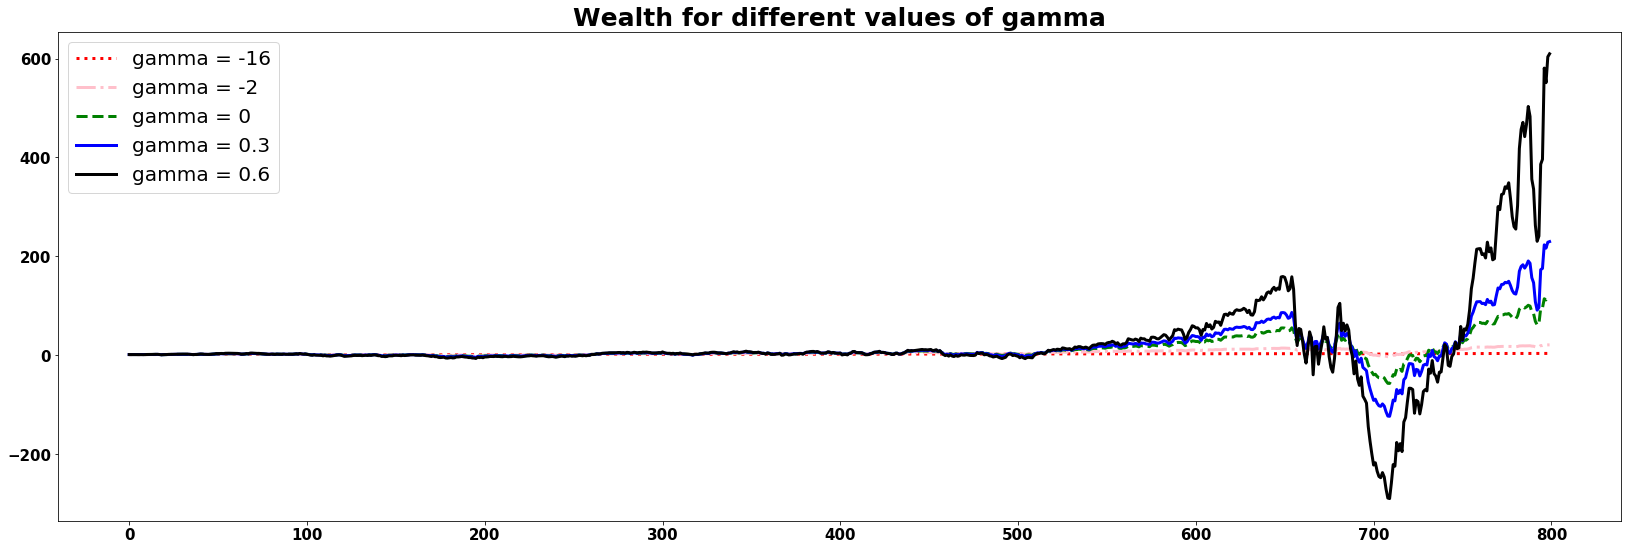

In [505]:
fig = plt.figure(figsize=(28,9))
plt.plot(tt.index,WEALTH[0],label = "gamma = -16" , color = 'r', linewidth = 3,linestyle=':')
plt.plot(tt.index,WEALTH[1],label = "gamma = -2" , color = 'pink', linewidth = 3,linestyle='-.')
plt.plot(tt.index,WEALTH[2],label = "gamma = 0" , color = 'g', linewidth = 3,linestyle='--')
plt.plot(tt.index,WEALTH[3],label = "gamma = 0.3" , color = 'b', linewidth = 3)
plt.plot(tt.index,WEALTH[4],label = "gamma = 0.6" , color = 'k', linewidth = 3)
plt.title('Wealth for different values of gamma',fontsize = 25 , fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.legend(fontsize = 20)
plt.show()

In [500]:
def MD(df):
    md = (df.cummax()-df)/df.cummax()
    return np.round(md,4)

In [501]:
md1 = MD(sigma1['sigma1_wealth'])
md2 = MD(sigma3['sigma3_wealth'])
md3 = MD(real_data['real_data_wealth'])

[]

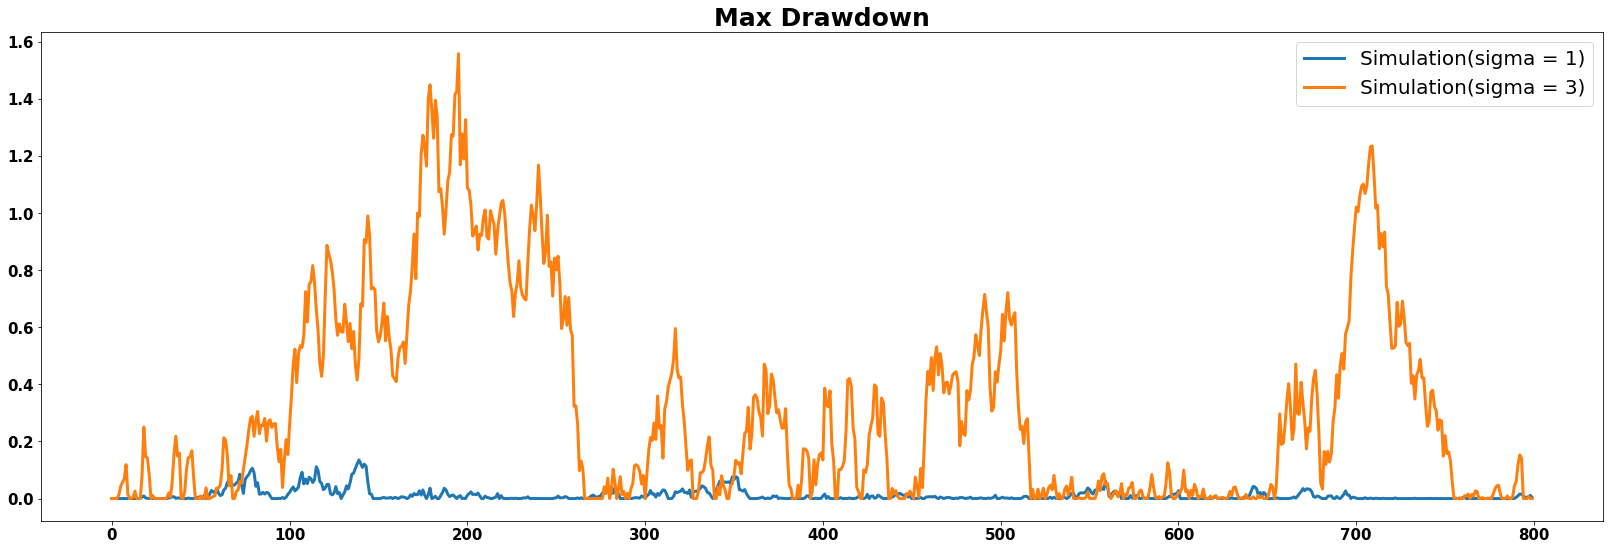

In [504]:
fig = plt.figure(figsize = (28,9))
plt.plot(sigma1.index,md1,label = 'Simulation(sigma = 1)',linewidth = 3)
plt.plot(sigma1.index,md2,label = 'Simulation(sigma = 3)',linewidth = 3)
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.title('Max Drawdown',fontsize = 25 , fontweight = 'bold')
plt.legend(fontsize = 20)
plt.plot()

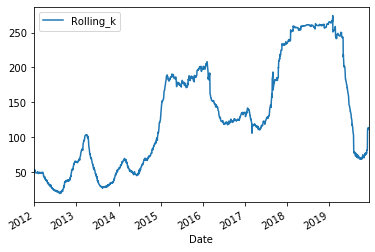

In [509]:
k_beta.plot()

In [510]:
df1.to_csv("df1.csv")
Xt.to_csv("Xt.csv")
df.to_csv("df.csv")

In [506]:
print('Done')

Done


# 5.Modifications

Based on the suggestion of Professor:
- Consider more kinds of assets
- Transaction cost: 0.005
- Wealth should always be larger than zero
- The bands will become larger when the sigma is higher

In [567]:
def pair_trading(asset1,asset2):

    gamma=-2
    start = datetime.datetime(2010,1, 1) # or start = '1/1/2016'
    end = datetime.date.today()
    price1 = web.DataReader(asset1, 'yahoo', start, end)
    price2 = web.DataReader(asset2,'yahoo',start,end)

    diff = price1['Adj Close'] - price2['Adj Close']
    Xt = pd.DataFrame()
    Xt['Xt'] = diff

    #parameters
    dt = 1/252
    T = len(Xt)/252
    N = round(T/dt)
    t = np.linspace(0,T,N)
    
    
    Xt = Xt.rename(columns = {'diff':'Xt'})
    
    Xt['dx'] = Xt.Xt - Xt.Xt.shift(1)

    Xt = Xt.dropna()
    Xt['ma252'] = pd.DataFrame(Xt.Xt.rolling(window=252).mean())
    Xt['sig'] = pd.DataFrame(Xt.Xt.rolling(window=252).std())
    Xt.head()

    win = 252
    X = pd.DataFrame((Xt['Xt']-Xt['ma252']).dropna()).values*dt
    num = -len(X)
    y = pd.DataFrame(Xt['dx'][num:]).values
    k_rolling = []
    import warnings
    warnings.filterwarnings("ignore") 
    for t in range(0,len(X)-win+1):
        #start = time.clock()
        trainX = X[t:t+win]
        trainY = y[t:t+win]
        reg = LinearRegression().fit(trainX, trainY)
        reg.score(X, y)

        k_rolling.append(reg.coef_)
        #elapsed = (time.clock() - start)
        #print("Time used:", elapsed, 'sec')

    k_coff = []
    for i in range(len(k_rolling)):
        k_coff.append(k_rolling[i][0][0])

    k_beta = pd.DataFrame(k_coff,index = Xt[win+win-2:].index,columns = ['Rolling_k'])

    Xt = Xt.join(k_beta).dropna()

    T = len(Xt)/252
    dt = 1/252
    N = round(T/dt)
    t = np.linspace(0,T,N)
    gamma=-2

    Xt['t'] = np.arange(0, len(Xt))/252
    Xt['tao'] = T - Xt['t']

    Xt.head() 

    Xt['Ct'] = np.cosh(v*pd.DataFrame(Xt['tao']).values) + v*np.sinh(v*pd.DataFrame(Xt['tao']).values)
    Xt['C1t']= (v)*np.sinh(v*Xt['tao']) + (v**2)*np.cosh(v*Xt['tao'])
    Xt['Dt']= Xt['C1t']/Xt['Ct']
    Xt.head()

    w = [1]
    alpha = [0]
    x = [0]
    for i in range(0,len(t)-1):
        alpha.append(-w[i]*(Xt.Xt[i]-Xt.ma252[i])*Xt.Dt[i])
        if abs(Xt.Xt[i]-Xt.ma252[i]) >= np.sqrt(1/Xt.Dt[i]):
            alpha[i+1] = 0
        if (w[i]+alpha[i+1]*Xt.dx[i+1]*0.95) == 0:
            w.append(0)
        else:
            w.append(w[i]+alpha[i+1]*Xt.dx[i+1]*0.95)
  
    Xt['position'] = alpha
    Xt['wealth'] = w      
    Xt['upper_band'] = np.sqrt(Xt.sig*1/Xt.Dt)
    Xt['lower_band'] = - Xt['upper_band']    
        
    fig = plt.figure(figsize=(28,9))
    plt.plot(Xt.index, Xt.Xt - Xt.ma252, linewidth = 1.5,label = 'Price(Xt)')  
    plt.plot(Xt.index, Xt.position, linewidth=1.5,color = 'r',label = 'Position') 
    plt.title(asset1+"_"+asset2+"_"+"Position and Price (ETF)",fontsize = 24, fontweight = 'bold') 
    plt.plot(Xt.index, Xt.upper_band, linewidth=3.0,color = 'c',label = 'upper_band') 
    plt.plot(Xt.index, Xt.lower_band, linewidth=3.0,color = 'orange',label = 'lower_band') 
    plt.xticks(fontsize = 15, fontweight = 'bold')
    plt.yticks(fontsize = 15, fontweight = 'bold')
    plt.axhline(0, color='k',linestyle='--')
    plt.legend(fontsize = 20)
    plt.show()
    plt.savefig(asset1+"_"+asset2+"price_position"+".png")

    fig = plt.figure(figsize=(25,9))
    plt.plot(Xt.index, Xt.wealth, linewidth=3.0,label = 'Wealth') 
    plt.title(asset1+"_"+asset2+"_"+"Wealth (ETF)",fontsize = 24, fontweight = 'bold') 
    plt.xticks(fontsize = 15, fontweight = 'bold')
    plt.yticks(fontsize = 15, fontweight = 'bold')
    plt.legend(fontsize = 20)
    plt.show()
    plt.savefig(asset1+"_"+asset2+"wealth"+".png")

    return

#US Stocks
For our example, we will look at two businesses that are highly correlated: GM and Ford. Since both are American auto manufacturers, their stocks tend to move together.

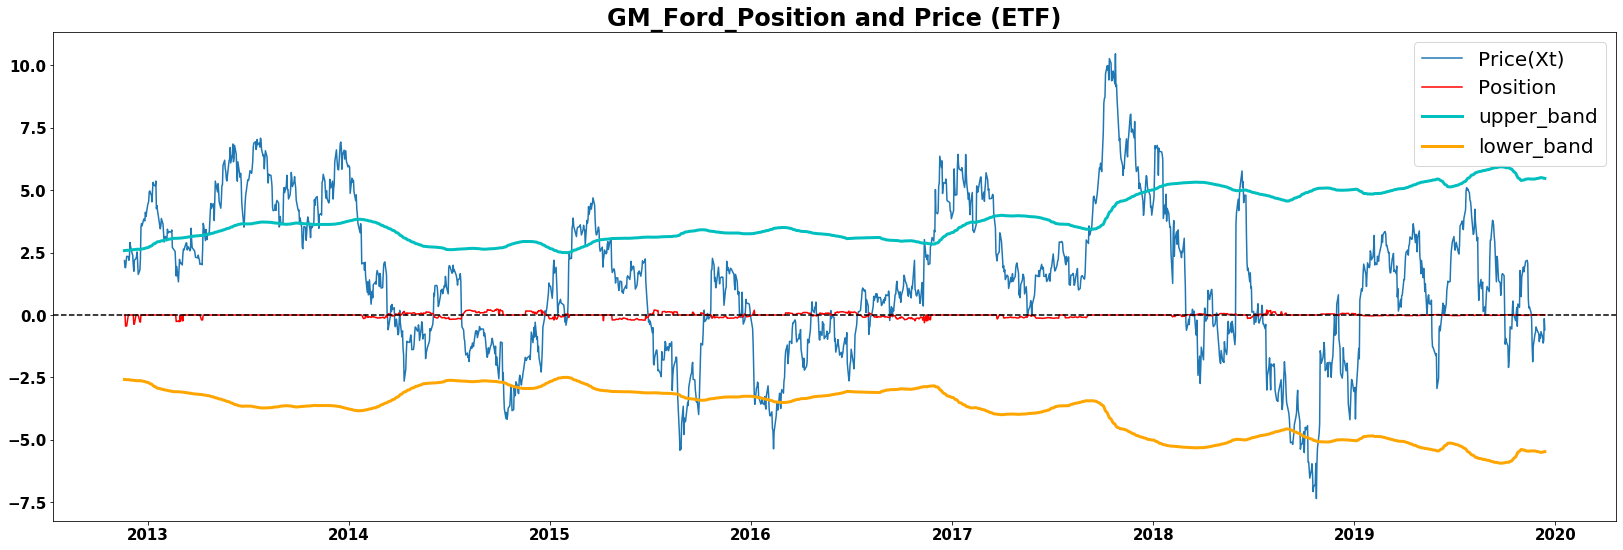

<Figure size 432x288 with 0 Axes>

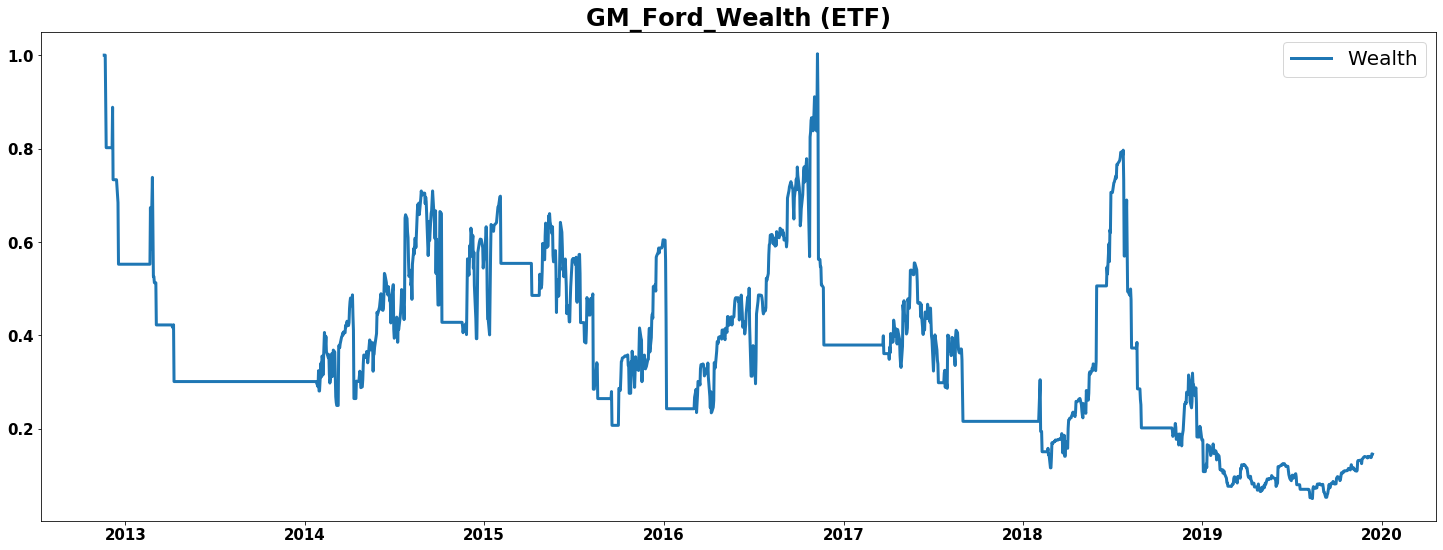

<Figure size 432x288 with 0 Axes>

In [568]:
pair_trading('GM','Ford')

#China Stock Market Stock
bank stocks feature high correlations in Chinese and Hong Kong stock market

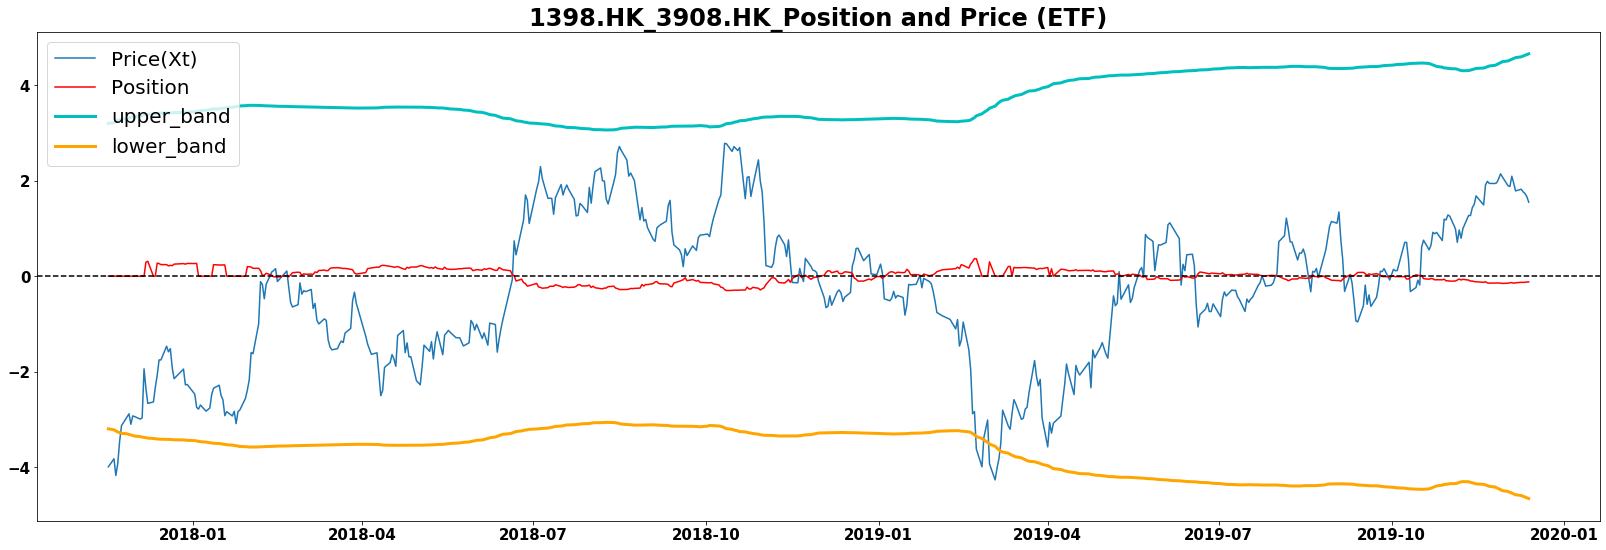

<Figure size 432x288 with 0 Axes>

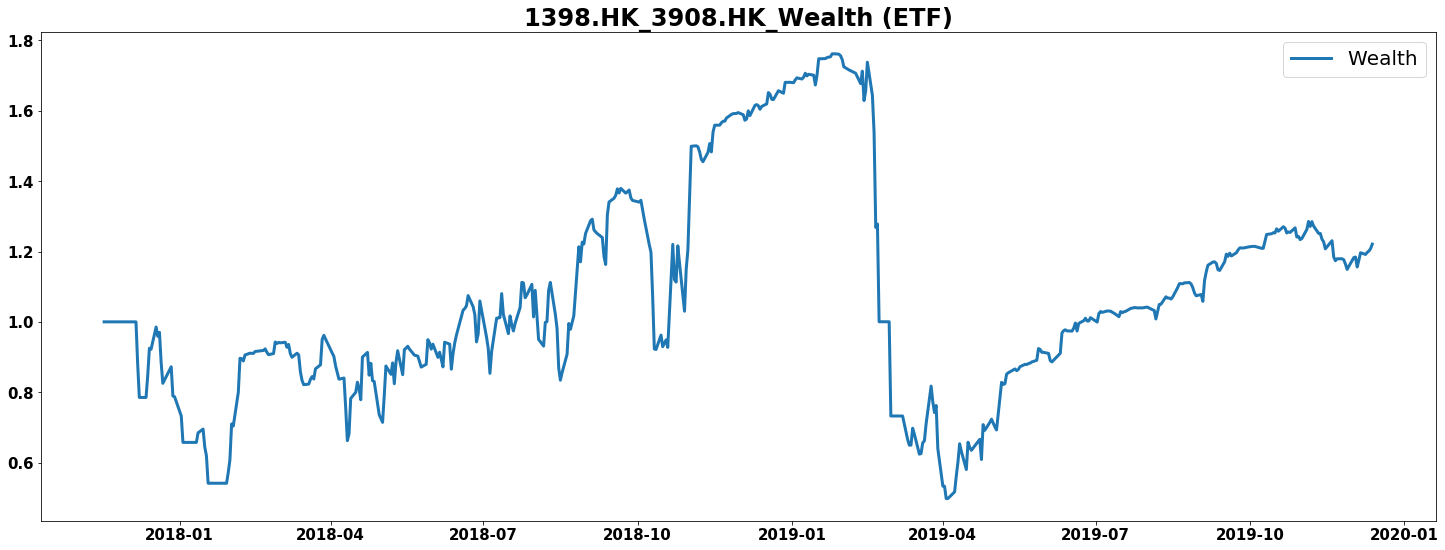

<Figure size 432x288 with 0 Axes>

In [572]:
pair_trading('1398.HK','3908.HK')

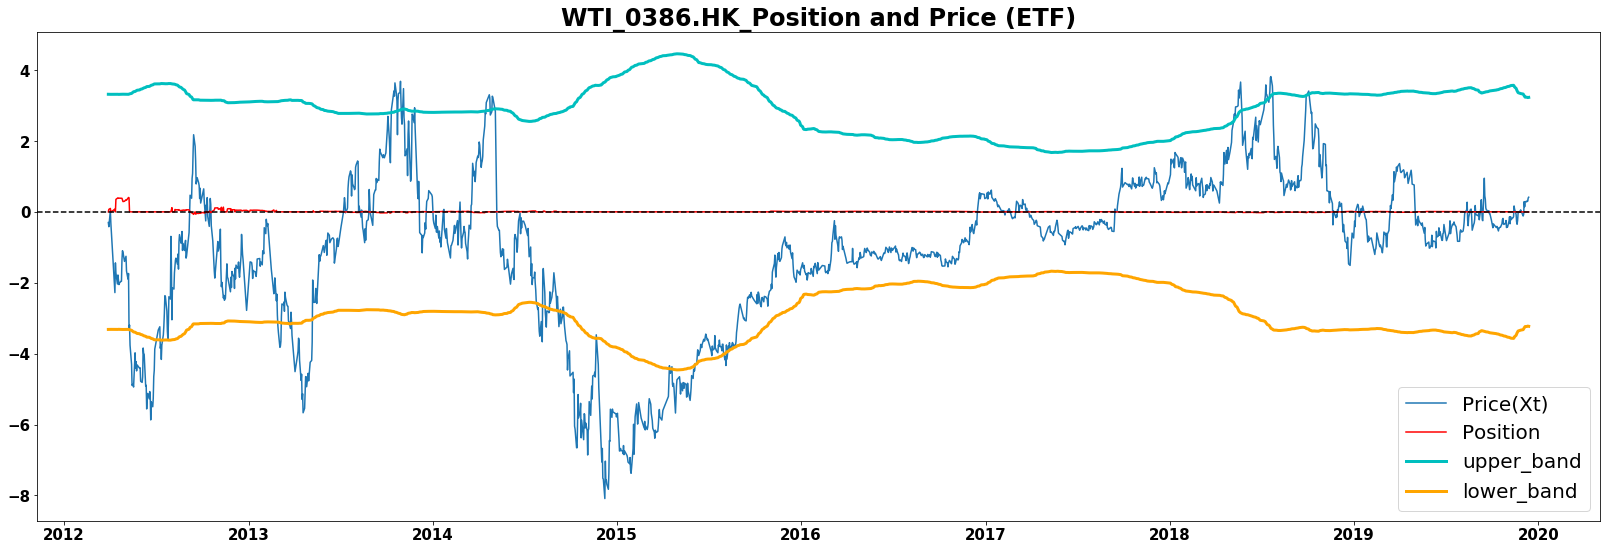

<Figure size 432x288 with 0 Axes>

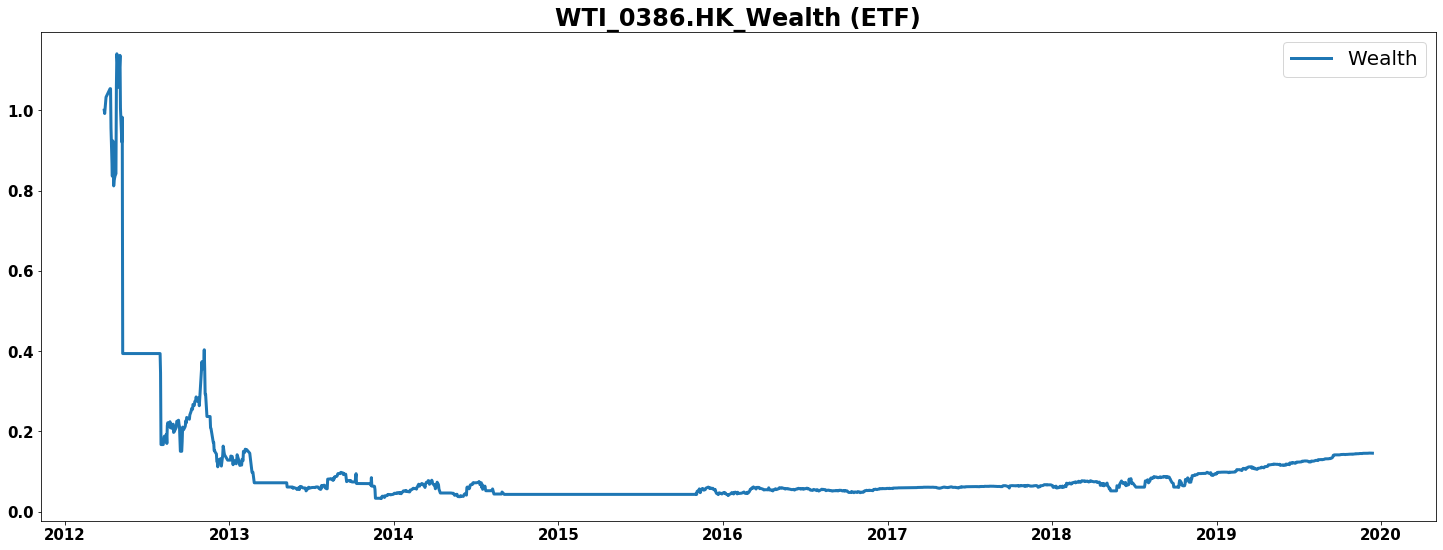

<Figure size 432x288 with 0 Axes>

In [573]:
#Commodities
pair_trading('WTI','0386.HK')

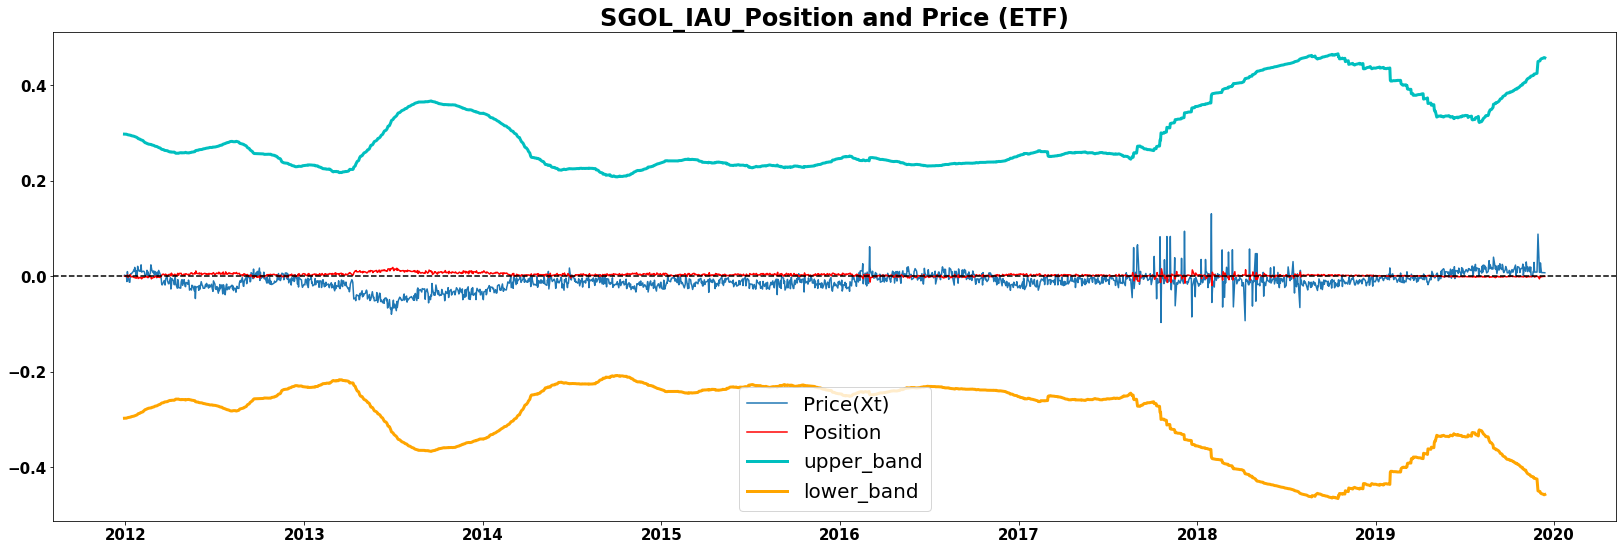

<Figure size 432x288 with 0 Axes>

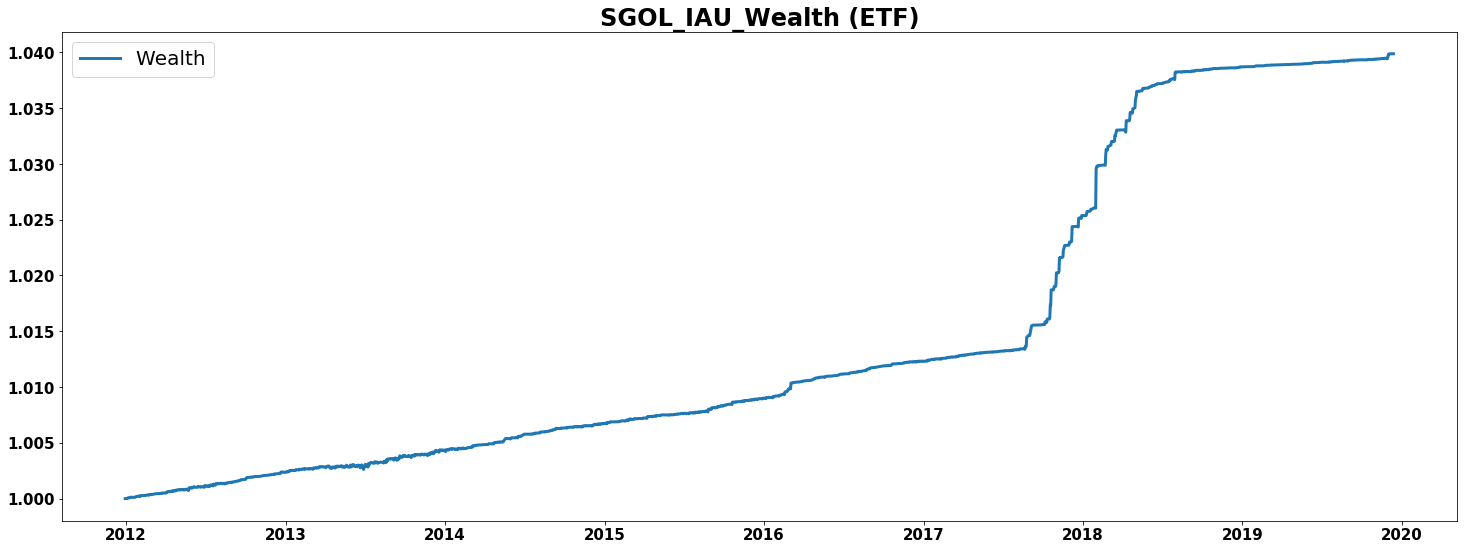

<Figure size 432x288 with 0 Axes>

In [576]:
# 
pair_trading('SGOL','IAU')

In [575]:
print("done")

done
